In [1]:
%matplotlib notebook
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_rows', None)
country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
country_data_df.columns

Index(['iso3c', 'region_id', 'country_name', 'income_id', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'other_information_information_system_for_solid_waste_management',
       'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
       'other_information_national_law_governing_solid_waste_management_in_the_country',
       'other_information_ppp_rules_and_regulations',
       'other_information_summary_of_key_solid_waste_information_made_available_to_the_public',
       'population_population_number_of_people',
       'special_waste_agricultural_waste_tons_year',
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_w

# Treatment columns

In [3]:
Treatment = country_data_df[['country_name', 
                             'income_id',
                             'gdp',
                        'population_population_number_of_people',   
                        'total_msw_total_msw_generated_tons_year',
                       'waste_treatment_anaerobic_digestion_percent',
                       'waste_treatment_compost_percent',
                       'waste_treatment_controlled_landfill_percent',
                       'waste_treatment_incineration_percent',
                       'waste_treatment_landfill_unspecified_percent',
                       'waste_treatment_open_dump_percent', 
                       'waste_treatment_other_percent',
                       'waste_treatment_recycling_percent',
                       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
                       'waste_treatment_unaccounted_for_percent',
                       'waste_treatment_waterways_marine_percent']]
Treatment.fillna(0).set_index('country_name')

,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent
country_name,,,,,,,,,,,,,,,
Aruba,HIC,0.000000e+00,1.031870e+05,8.813202e+04,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000,11.000000,0.00000,89.000000,0.0
Afghanistan,LIC,2.141361e+10,3.465603e+07,5.628525e+06,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.00000,0.000000,0.0
Angola,LMC,1.030423e+11,2.509615e+07,4.213644e+06,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.00000,0.000000,0.0
Albania,UMC,1.347108e+10,2.880703e+06,1.142964e+06,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.00000,0.000000,0.0
Andorra,HIC,3.319880e+09,8.243100e+04,4.300000e+04,0.0,0.000000,0.000000,52.100000,0.000,0.000000,0.000,0.000000,0.00000,47.900000,0.0
United Arab Emirates,HIC,3.842225e+11,9.269612e+06,5.413453e+06,0.0,9.000000,0.000000,0.000000,9.000,62.000000,0.000,20.000000,0.00000,0.000000,0.0
Argentina,HIC,4.475178e+11,4.298152e+07,1.791055e+07,0.0,0.000000,8.900000,0.000000,0.000,22.600000,0.000,6.000000,62.50000,0.000000,0.0
Armenia,UMC,1.150200e+10,2.906220e+06,4.928000e+05,0.0,0.000000,0.000000,0.000000,0.000,100.000000,0.000,0.000000,0.00000,0.000000,0.0
American Samoa,UMC,5.345551e+08,5.559900e+04,1.898949e+04,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.00000,0.000000,0.0


# Group by and get_group

In [34]:
Treatment_LIC = Treatment.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Treatment_LIC.sum(axis=0)
df_LIC= pd.DataFrame(df1)

Treatment_LMC = Treatment.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
df2 = Treatment_LMC.sum(axis=0)
df_LMC= pd.DataFrame(df2)

Treatment_UMC = Treatment.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
df3 = Treatment_UMC.sum(axis=0)
df_UMC= pd.DataFrame(df3)

Treatment_HIC = Treatment.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
df4 = Treatment_HIC.sum(axis=0)
df_HIC= pd.DataFrame(df4)

df_Treatment = pd.concat([df_LIC,df_LMC,df_UMC,df_HIC ], axis=1)
df_Treatment.columns=["LIC", "LMC", "UMC", "HIC"]
df_Treatment.index.names = ['Treatment']
df_Treatment

df_Treatment["Total"] = df_Treatment["LIC"] + df_Treatment["LMC"] + df_Treatment["UMC"] + df_Treatment["HIC"]
df_world = df_Treatment.drop(['income_id'])
df_world["Total"] = df_world["Total"].astype(float)
df_world["Prop_LIC"] = ((df_world["LIC"] / df_world["Total"]) * 100).astype(float)
df_world["Prop_LMC"] = ((df_world["LMC"] / df_world["Total"]) * 100).astype(float)
df_world["Prop_UMC"] = ((df_world["UMC"]/ df_world["Total"]) * 100).astype(float)
df_world["Prop_HIC"] = ((df_world["HIC"]/ df_world["Total"]) * 100).astype(float)


df=df_world.rename(index = {'gdp': 'GDP',
                        'population_population_number_of_people': 'Population',
                        'total_msw_total_msw_generated_tons_year': 'Total_MSW',#'Total_MSW_tons',
                     'waste_treatment_anaerobic_digestion_percent':'Anaerobic digestion',
                      'waste_treatment_compost_percent': 'Compost',
                      'waste_treatment_controlled_landfill_percent': 'Controlled landfill',
                      'waste_treatment_incineration_percent':'Incineration',
                      'waste_treatment_landfill_unspecified_percent':'Landfill unspecified',
                      'waste_treatment_open_dump_percent':'Open dump',
                      'waste_treatment_other_percent':'Other',
                      'waste_treatment_recycling_percent':'Recycling',
                      'waste_treatment_sanitary_landfill_landfill_gas_system_percent':'Sanitary & landfill & gas',
                      'waste_treatment_unaccounted_for_percent':'Unaccounted',
                      'waste_treatment_waterways_marine_percent':'Waterways & marine'})
df.reset_index()
a = df.drop(['LIC', 'LMC', 'UMC', 'HIC', 'Total'], axis=1)
a.rename(columns = {'Prop_LIC':'LIC', 'Prop_LMC':'LMC', 'Prop_UMC':'UMC', 'Prop_HIC':'HIC'}, inplace = True)
Transposed_Treatment = a.T
Transposed_Treatment

Treatment,GDP,Population,Total_MSW,Anaerobic digestion,Compost,Controlled landfill,Incineration,Landfill unspecified,Open dump,Other,Recycling,Sanitary & landfill & gas,Unaccounted,Waterways & marine
LIC,0.502179,9.069889,5.122160,0.0,1.747421,1.489673,0.000000,2.455136,23.154665,11.876520,4.011004,0.563618,22.370416,5.259698
LMC,8.083164,37.045458,23.683429,0.0,10.939906,21.302216,0.200022,13.989960,30.008735,56.058385,10.903988,14.310267,27.444833,53.254438
UMC,25.767230,36.249984,33.631259,75.0,13.276427,40.932693,3.059675,28.922494,35.619726,18.351188,13.918786,57.615910,23.347902,41.420118
HIC,65.647427,17.634668,37.563152,25.0,74.036245,36.275418,96.740303,54.632410,11.216874,13.713906,71.166222,27.510205,26.836849,0.065746


In [35]:
df_total = Treatment.fillna(0).drop_duplicates().sum(axis=0) #.sum()
a = pd.DataFrame(df_total)
Total = a[0].sum()
Total

df_LIC = Treatment.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().sum(axis=0).drop(['country_name','income_id'], axis=0)
Total_LIC= pd.DataFrame(df_LIC)
Treatment_LIC = Total_LIC[0].sum()
percentLIC = Treatment_LIC / Total *100
percentLIC

df_LMC = Treatment.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().sum(axis=0).drop(['country_name','income_id'], axis=0)
Total_LMC= pd.DataFrame(df_LMC)
Treatment_LMC = Total_LMC[0].sum()
percentLMC = Treatment_LMC / Total *100
percentLMC

df_UMC = Treatment.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().sum(axis=0).drop(['country_name','income_id'], axis=0)
Total_UMC= pd.DataFrame(df_UMC)
Treatment_UMC = Total_UMC[0].sum()
percentUMC = Treatment_UMC / Total *100
percentUMC

df_HIC = Treatment.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().sum(axis=0)#.drop(['country_name','income_id'], axis=0)
Total_HIC= pd.DataFrame(df_HIC)
Treatment_HIC = Total_HIC[0].sum()
percentHIC = Treatment_HIC / Total *100
percentHIC

Treatment_percent = [10.35 ,20.16, 28.20, 41.30] 
a = pd.DataFrame(Treatment_percent) 
b = a.T
b.columns = ['LIC', 'LMC', 'UMC', 'HIC']
b.index =['Treatment']
b


,LIC,LMC,UMC,HIC
Treatment,10.35,20.16,28.2,41.3


# Total MSW calculation

In [36]:
Total_MSW = country_data_df[['country_name', 
                       'income_id', 
                       #'gdp', 
                       'population_population_number_of_people', 
                       'total_msw_total_msw_generated_tons_year']]
Total_MSW.fillna(0).set_index('country_name').head(3)

,income_id,population_population_number_of_people,total_msw_total_msw_generated_tons_year
country_name,,,
Aruba,HIC,103187.0,8.813202e+04
Afghanistan,LIC,34656032.0,5.628525e+06
Angola,LMC,25096150.0,4.213644e+06


In [37]:
# rate of MSW generation per day = total_msw_total_msw_generated_tons_year / 365

#MSW['rate_per_day_kgs'] = MSW['total_msw_total_msw_generated_tons_year'] / 365
Total_MSW['msw_per_day'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / 365
Total_MSW['msw_per_day_per_person'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / Total_MSW["population_population_number_of_people"]
Total_MSW

<ipython-input-37-097f24fa3491>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['msw_per_day'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / 365
<ipython-input-37-097f24fa3491>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['msw_per_day_per_person'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / Total_MSW["population_population_number_of_people"]


,country_name,income_id,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person
0,Aruba,HIC,1.031870e+05,8.813202e+04,241.457580,0.854100
1,Afghanistan,LIC,3.465603e+07,5.628525e+06,15420.617452,0.162411
2,Angola,LMC,2.509615e+07,4.213644e+06,11544.229000,0.167900
3,Albania,UMC,2.880703e+06,1.142964e+06,3131.408219,0.396766
4,Andorra,HIC,8.243100e+04,4.300000e+04,117.808219,0.521648
5,United Arab Emirates,HIC,9.269612e+06,5.413453e+06,14831.379200,0.584000
6,Argentina,HIC,4.298152e+07,1.791055e+07,49070.000000,0.416704
7,Armenia,UMC,2.906220e+06,4.928000e+05,1350.136986,0.169567
8,American Samoa,UMC,5.559900e+04,1.898949e+04,52.026000,0.341544
9,Antigua and Barbuda,HIC,9.677700e+04,3.058500e+04,83.794521,0.316036


In [38]:
#Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person'].rank(ascending = True)
# Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person']
# Total_MSW

In [39]:
df_world = Total_MSW
msw_per_person = df_world.drop(['population_population_number_of_people', 
               'total_msw_total_msw_generated_tons_year', 
               'msw_per_day'], axis=1)

In [40]:
Treatment_LIC = msw_per_person.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Treatment_LIC.median()
msw_LIC= pd.DataFrame(df1)


Treatment_LMC = msw_per_person.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
df2 = Treatment_LMC.median()
msw_LMC= pd.DataFrame(df2)

Treatment_UMC = msw_per_person.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
df3 = Treatment_UMC.median()
msw_UMC= pd.DataFrame(df3)

Treatment_HIC = msw_per_person.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
df4 = Treatment_HIC.median()
msw_HIC= pd.DataFrame(df4)


MSW_per_person = pd.concat([msw_LIC, msw_LMC, msw_UMC, msw_HIC], axis=1)
MSW_per_person.index.names = ['Median waste/Person/day(kgs)']
MSW_per_person.columns=['LIC','LMC', 'UMC', 'HIC']
# MSW_per_person.reset_index(level=0, inplace=True)
# MSW_per_person['Median waste/Person/day(kgs)'] = MSW_per_person['Median waste/Person/day(kgs)'].replace({'msw_per_day_per_person': 'median waste per person'})
# MSW_per_person.set_index(['Median waste/Person/day(kgs)'])

MSW_per_person.reset_index()
Transposed_MSW = MSW_per_person.T
Transposed_MSW

Median waste/Person/day(kgs),msw_per_day_per_person
LIC,0.160683
LMC,0.170360
UMC,0.304267
HIC,0.521648


# HeatMap data

In [41]:
df_corr = pd.concat([Transposed_Treatment ,Transposed_MSW], axis=1)
#df_corr.reset_index()#.columns=["LIC", "LMC", "UMC", "HIC"]

df_corr.index.names = ['Income']
df_corr

,GDP,Population,Total_MSW,Anaerobic digestion,Compost,Controlled landfill,Incineration,Landfill unspecified,Open dump,Other,Recycling,Sanitary & landfill & gas,Unaccounted,Waterways & marine,msw_per_day_per_person
Income,,,,,,,,,,,,,,,
LIC,0.502179,9.069889,5.122160,0.0,1.747421,1.489673,0.000000,2.455136,23.154665,11.876520,4.011004,0.563618,22.370416,5.259698,0.160683
LMC,8.083164,37.045458,23.683429,0.0,10.939906,21.302216,0.200022,13.989960,30.008735,56.058385,10.903988,14.310267,27.444833,53.254438,0.170360
UMC,25.767230,36.249984,33.631259,75.0,13.276427,40.932693,3.059675,28.922494,35.619726,18.351188,13.918786,57.615910,23.347902,41.420118,0.304267
HIC,65.647427,17.634668,37.563152,25.0,74.036245,36.275418,96.740303,54.632410,11.216874,13.713906,71.166222,27.510205,26.836849,0.065746,0.521648


In [42]:
df_corr.corr()


,GDP,Population,Total_MSW,Anaerobic digestion,Compost,Controlled landfill,Incineration,Landfill unspecified,Open dump,Other,Recycling,Sanitary & landfill & gas,Unaccounted,Waterways & marine,msw_per_day_per_person
GDP,1.000000,-0.085945,0.812143,0.347966,0.967307,0.715060,0.941382,0.989617,-0.645105,-0.366358,0.966878,0.426233,0.439201,-0.433160,0.995676
Population,-0.085945,1.000000,0.505638,0.447388,-0.211755,0.575085,-0.338642,0.055766,0.709088,0.679183,-0.231748,0.599236,0.373794,0.931962,-0.132104
Total_MSW,0.812143,0.505638,1.000000,0.625903,0.692986,0.973196,0.597227,0.887502,-0.112613,0.022924,0.681951,0.767776,0.529331,0.160577,0.788294
Anaerobic digestion,0.347966,0.447388,0.625903,1.000000,0.098832,0.783523,0.029159,0.433092,0.405464,-0.352497,0.098078,0.970694,-0.292198,0.217789,0.388796
Compost,0.967307,-0.211755,0.692986,0.098832,1.000000,0.547272,0.991265,0.933321,-0.794210,-0.292994,0.999735,0.189963,0.545665,-0.518219,0.951626
Controlled landfill,0.715060,0.575085,0.973196,0.783523,0.547272,1.000000,0.446440,0.805342,0.069000,-0.035477,0.537298,0.894430,0.351628,0.242311,0.704910
Incineration,0.941382,-0.338642,0.597227,0.029159,0.991265,0.446440,1.000000,0.889395,-0.861813,-0.368929,0.993637,0.097341,0.479330,-0.623509,0.932009
Landfill unspecified,0.989617,0.055766,0.887502,0.433092,0.933321,0.805342,0.889395,1.000000,-0.535457,-0.288038,0.930347,0.528743,0.472208,-0.303728,0.980832
Open dump,-0.645105,0.709088,-0.112613,0.405464,-0.794210,0.069000,-0.861813,-0.535457,1.000000,0.402116,-0.802736,0.394856,-0.324803,0.838628,-0.641506
Other,-0.366358,0.679183,0.022924,-0.352497,-0.292994,-0.035477,-0.368929,-0.288038,0.402116,1.000000,-0.313363,-0.168005,0.638720,0.793501,-0.448590


# Plotting

In [43]:
# # sns heatmap correlation
 
# plt.figure(figsize=(10,10))

# mask = np.zeros(df_corr.corr().shape, dtype=bool)
# mask[np.triu_indices(len(mask))] = True
# res = sns.heatmap(df_corr.corr(), vmin = -1, vmax = 1, cmap='BuPu', cbar_kws={"shrink": .70}, annot = True, mask = mask, annot_kws={"size": 10})

# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 7, rotation = 30, ha='right')
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 7)
# plt.title("Correlation of waste production / treatment", fontsize = 15)
# #plt.xlabel("Waste Management", fontsize = 10)
# #plt.ylabel("Countries", fontsize = 10)
# #plt.savefig('Correlation.png')
# plt.show()

In [44]:
df_corr_2 = df_corr.drop(['Anaerobic digestion','Waterways & marine'], axis=1)
df_corr_2 

,GDP,Population,Total_MSW,Compost,Controlled landfill,Incineration,Landfill unspecified,Open dump,Other,Recycling,Sanitary & landfill & gas,Unaccounted,msw_per_day_per_person
Income,,,,,,,,,,,,,
LIC,0.502179,9.069889,5.122160,1.747421,1.489673,0.000000,2.455136,23.154665,11.876520,4.011004,0.563618,22.370416,0.160683
LMC,8.083164,37.045458,23.683429,10.939906,21.302216,0.200022,13.989960,30.008735,56.058385,10.903988,14.310267,27.444833,0.170360
UMC,25.767230,36.249984,33.631259,13.276427,40.932693,3.059675,28.922494,35.619726,18.351188,13.918786,57.615910,23.347902,0.304267
HIC,65.647427,17.634668,37.563152,74.036245,36.275418,96.740303,54.632410,11.216874,13.713906,71.166222,27.510205,26.836849,0.521648


<IPython.core.display.Javascript object>


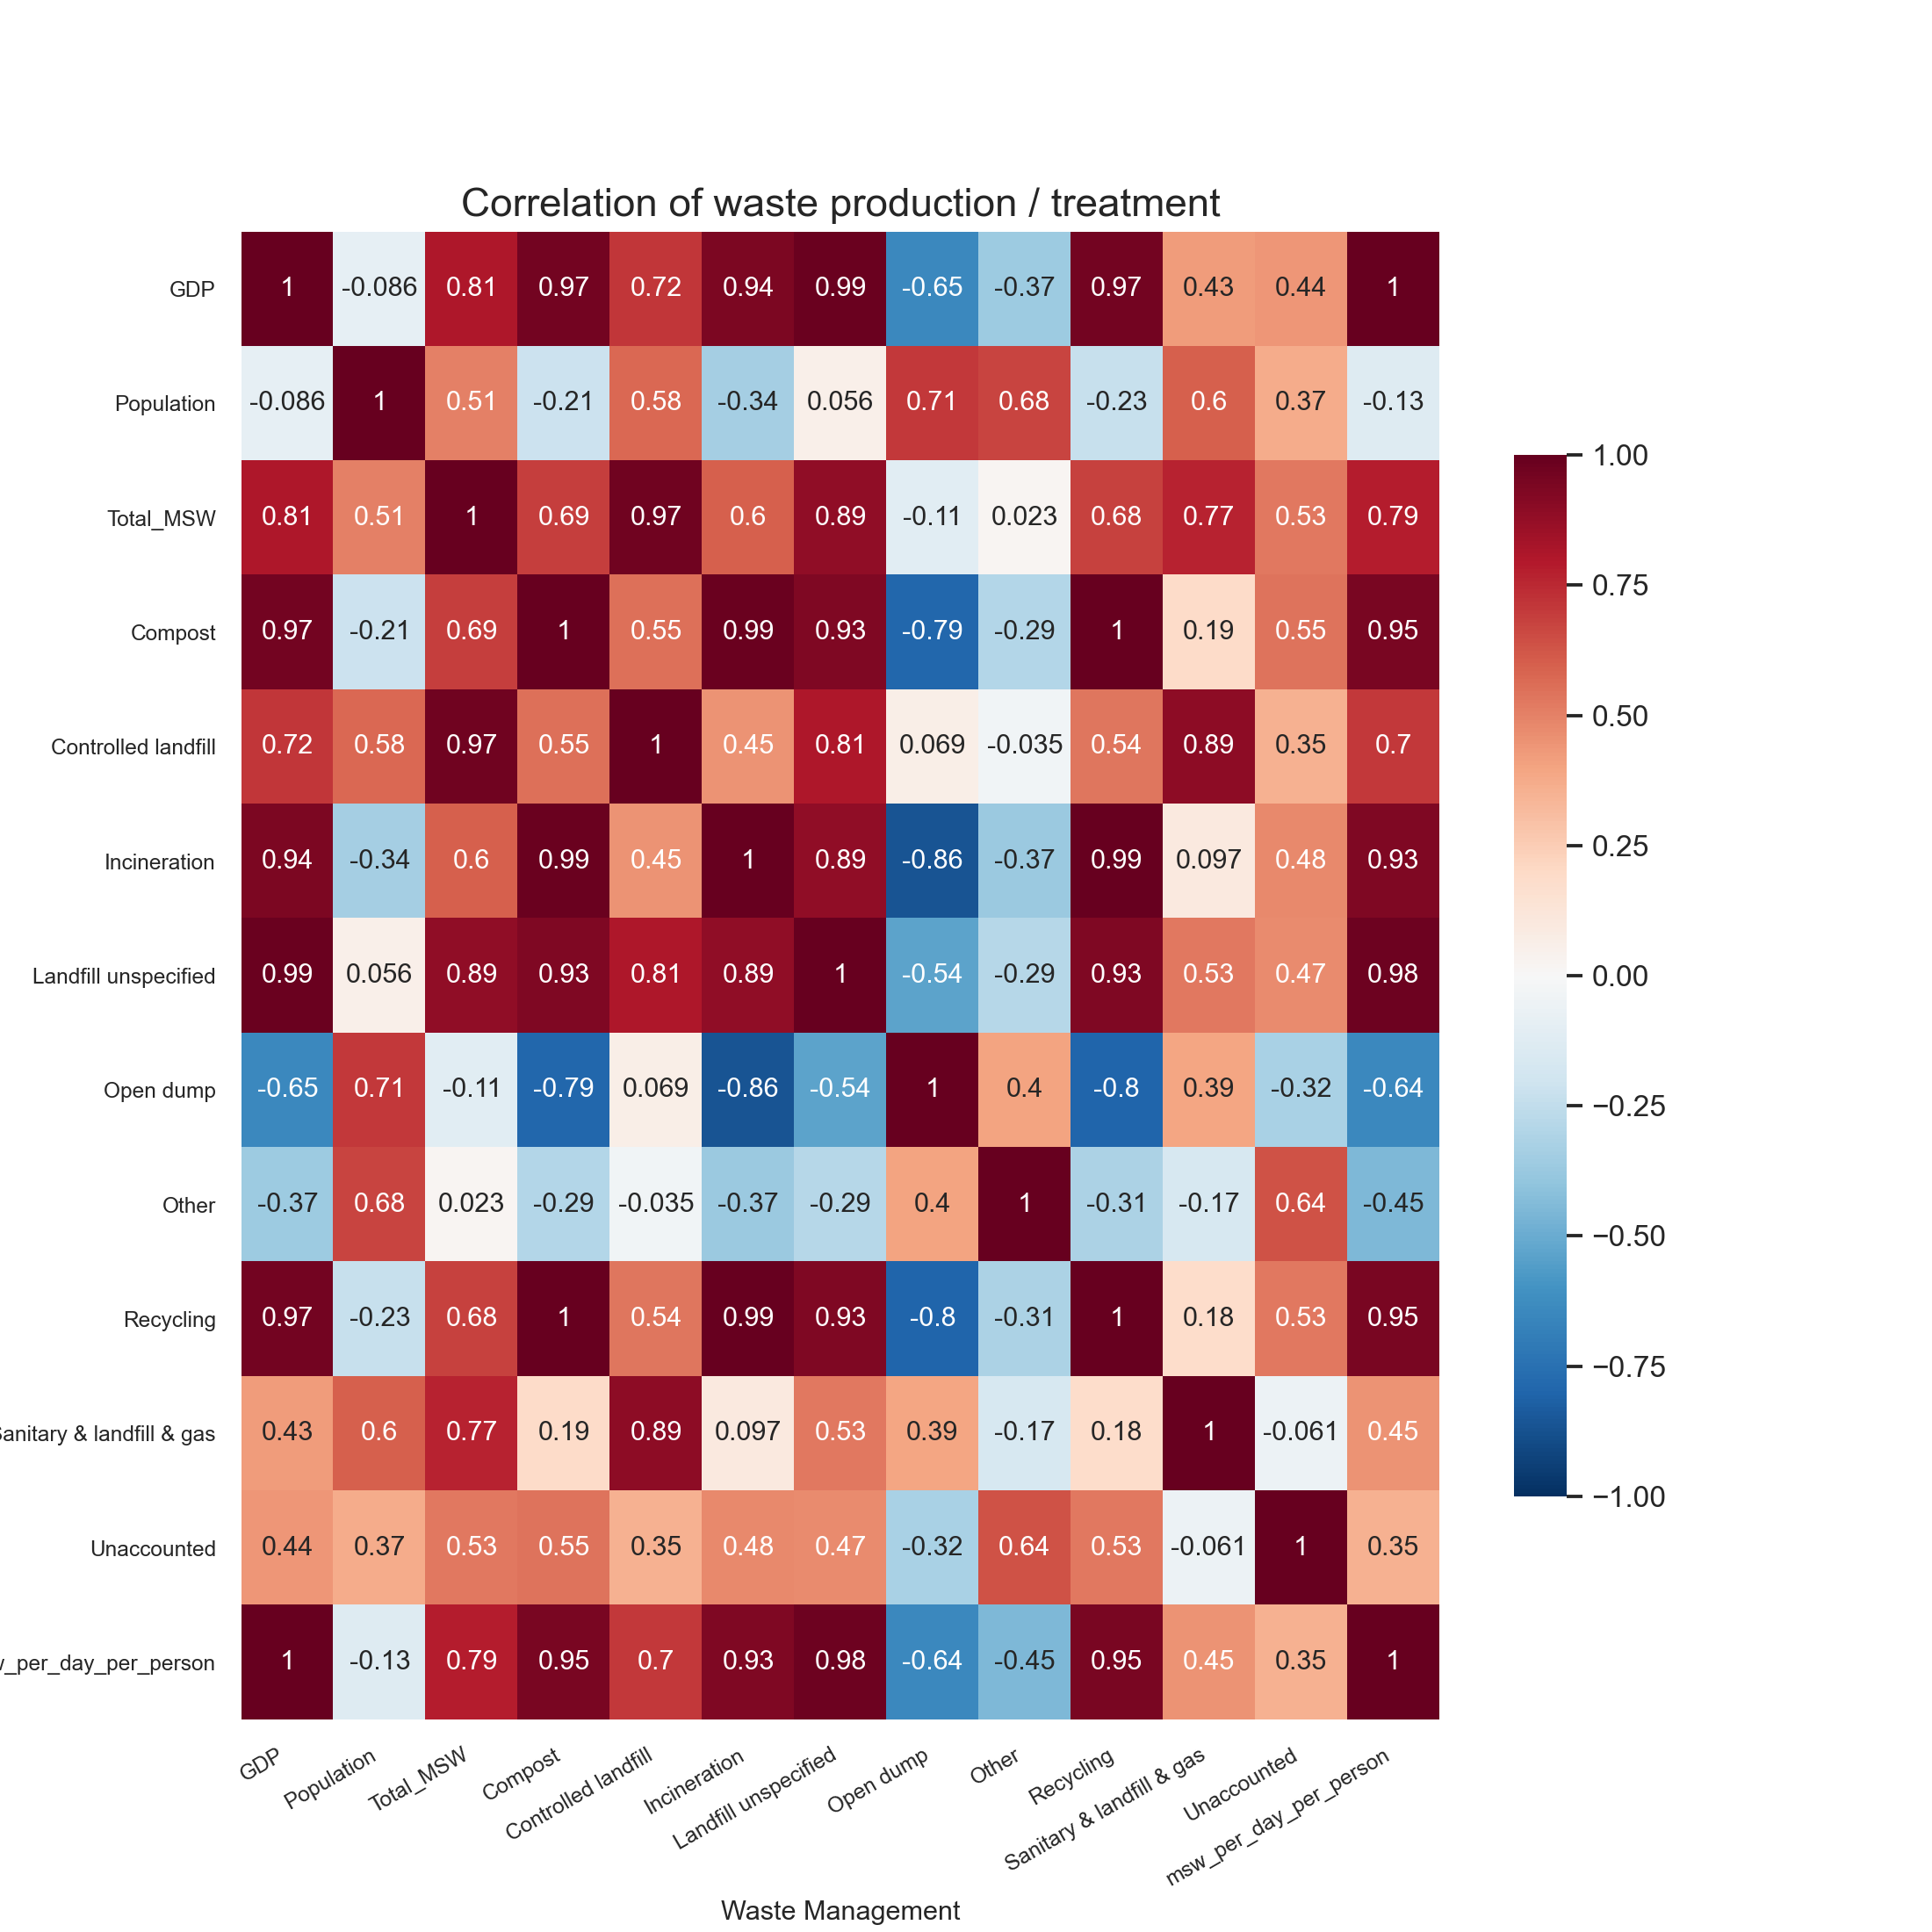

In [45]:
# sns heatmap correlation
 
plt.figure(figsize=(10,10))

#mask = np.zeros(df_corr.corr().shape, dtype=bool)
#mask[np.triu_indices(len(mask))] = True
res = sns.heatmap(df_corr_2.corr(), vmin = -1, vmax = 1, cmap='RdBu_r', cbar_kws={"shrink": .70}, annot = True,annot_kws={"size": 10})#,  mask = mask)

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 8, rotation = 30, ha='right')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 8)
plt.title("Correlation of waste production / treatment", fontsize = 15)
plt.xlabel("Waste Management", fontsize = 10)
plt.ylabel("Countries", fontsize = 10)
#plt.savefig('Full_Correlation.png')
plt.show()

In [47]:
df_corr_3 = df_corr_2[['GDP', 'Population', 'Total_MSW']]
df_corr_3

,GDP,Population,Total_MSW
Income,,,
LIC,0.502179,9.069889,5.122160
LMC,8.083164,37.045458,23.683429
UMC,25.767230,36.249984,33.631259
HIC,65.647427,17.634668,37.563152


<IPython.core.display.Javascript object>


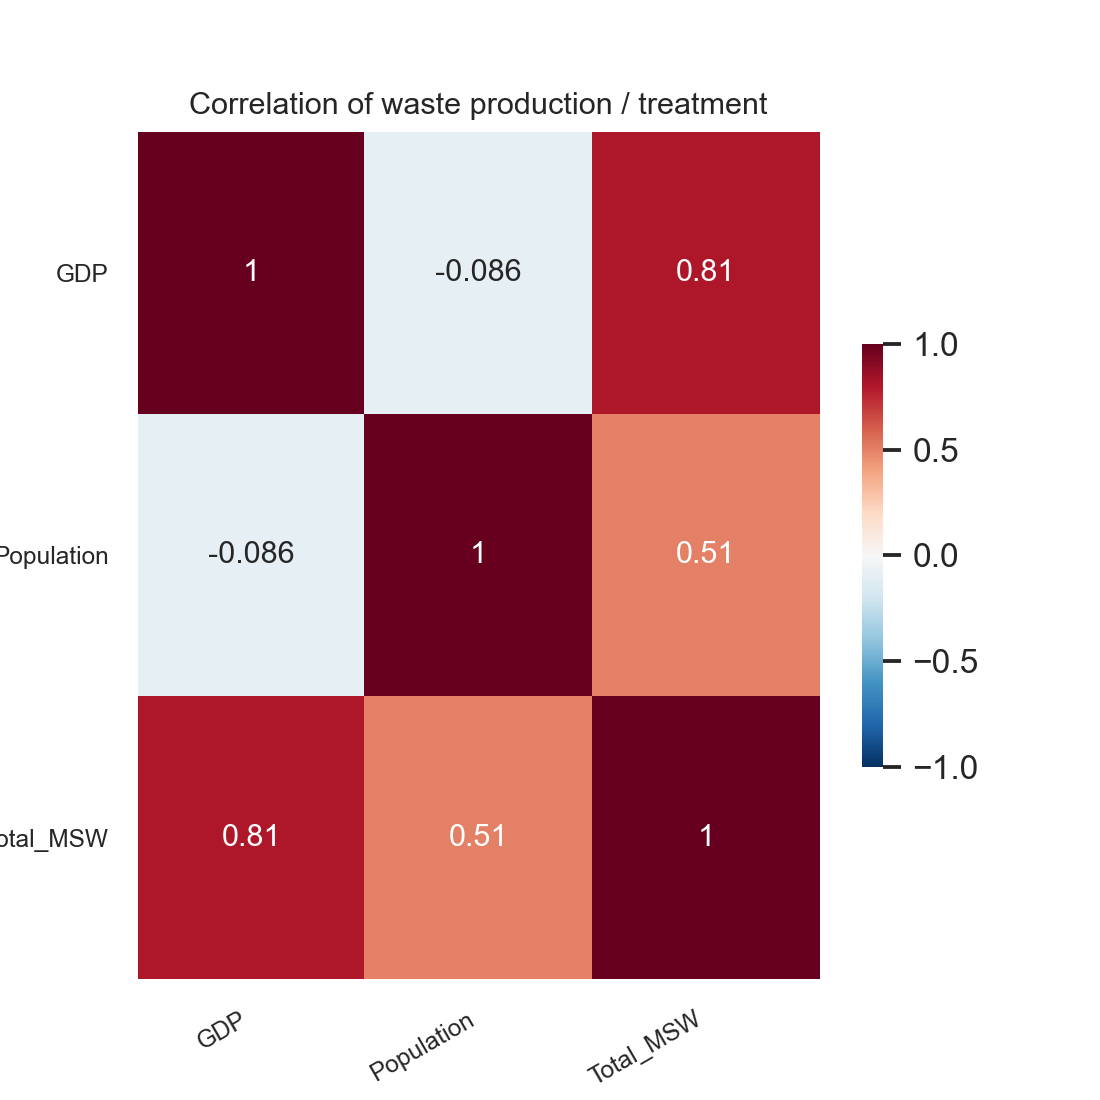

In [54]:
# sns heatmap correlation
 
plt.figure(figsize=(5,5))

#mask = np.zeros(df_corr.corr().shape, dtype=bool)
#mask[np.triu_indices(len(mask))] = True
res = sns.heatmap(df_corr_3.corr(), vmin = -1, vmax = 1, cmap='RdBu_r', cbar_kws={"shrink": .50}, annot = True,annot_kws={"size": 10})#,  mask = mask)

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 8, rotation = 30, ha='right')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 8, rotation = 0, ha='right')
plt.title("Correlation of waste production / treatment", fontsize = 10)
plt.xlabel("Waste Management", fontsize = 10)
plt.ylabel("Countries", fontsize = 10)
plt.savefig('Correlation_for_scatter.png')
plt.show()

# The end